<a href="https://colab.research.google.com/github/Cluque300/CD_2023_CarlosLuque/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
     

#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [7]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [8]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [9]:
df = df.select_dtypes(exclude=['object'])
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [10]:
#Buscar nulos
df.isnull().sum()
     

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

<Axes: >

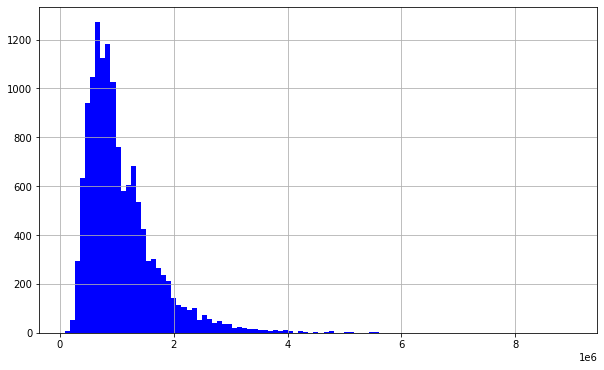

In [11]:
#Histograma
df.Price.hist(color='blue', bins=100, figsize=(10, 6))

In [12]:
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [13]:
#Buscar nulos
df.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


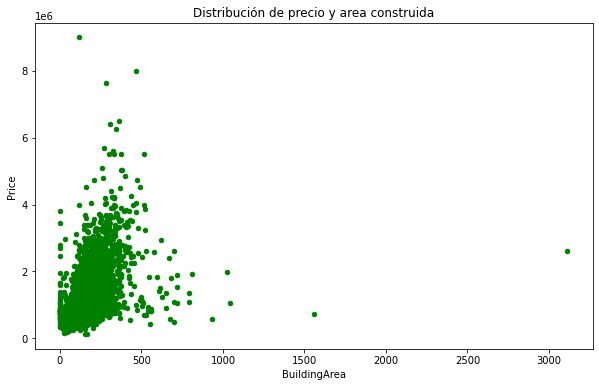

In [14]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'green', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [15]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]
     

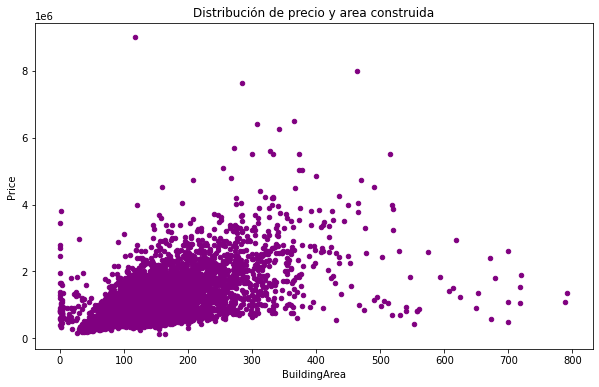

In [16]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'purple', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [17]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]==0]
dfzero

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
4344,2,841000.0,2.3,3051.0,2.0,1.0,1.0,215.0,0.0,2000.0,-37.79530,144.94370,6821.0
12226,5,1950000.0,9.7,3104.0,5.0,3.0,2.0,743.0,0.0,1949.0,-37.80235,145.09311,7809.0
12249,3,814000.0,12.1,3083.0,3.0,1.0,2.0,542.0,0.0,1970.0,-37.70861,145.05691,10175.0
12395,4,570000.0,20.6,3064.0,4.0,2.0,2.0,504.0,0.0,2000.0,-37.61419,144.93448,5833.0
12412,3,900000.0,7.0,3071.0,3.0,2.0,2.0,120.0,0.0,2000.0,-37.76343,145.02096,8870.0
13040,3,1390000.0,4.6,3181.0,3.0,2.0,1.0,125.0,0.0,2002.0,-37.85257,145.00296,7717.0
13207,3,1205000.0,12.3,3166.0,3.0,2.0,4.0,622.0,0.0,1960.0,-37.90823,145.10851,768.0
13348,5,2800000.0,9.7,3104.0,5.0,2.0,2.0,1173.0,0.0,1960.0,-37.80385,145.09094,7809.0
13370,3,1650000.0,10.3,3187.0,3.0,2.0,2.0,623.0,0.0,1920.0,-37.92698,145.02673,6938.0
13380,4,815000.0,12.1,3083.0,4.0,2.0,1.0,525.0,0.0,1965.0,-37.70765,145.05556,10175.0


In [18]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>15]

In [19]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['Price']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


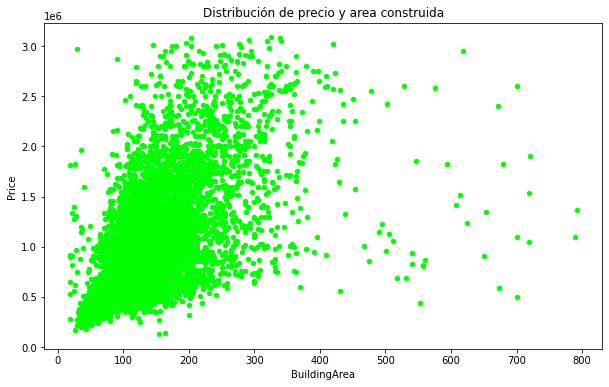

In [20]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'lime', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [21]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

0

In [22]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>15]

In [23]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['Price']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


<Axes: >

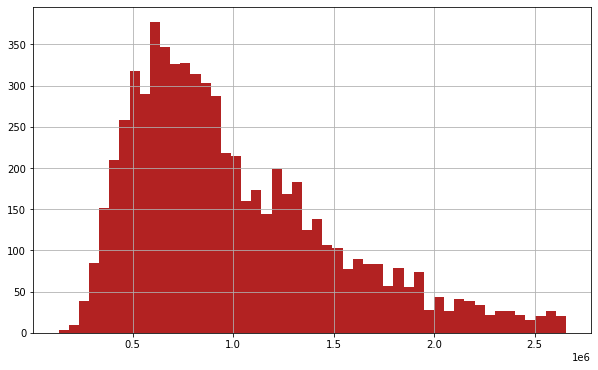

In [24]:
#Histograma
df0.Price.hist(color='firebrick', bins=50, figsize=(10, 6))

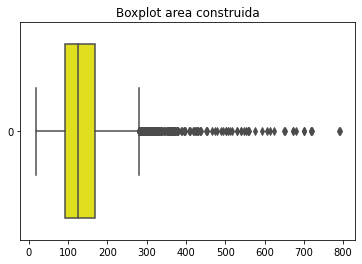

In [25]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

In [26]:
#Múltiples diagramas por parejas
#sb.set_theme(style="ticks")
#sb.pairplot(df0, hue='Rooms')

In [27]:
#Múltiples diagramas por parejas
#sb.set_theme(style="ticks")
#sb.pairplot(df0, hue='Price')
     

In [28]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

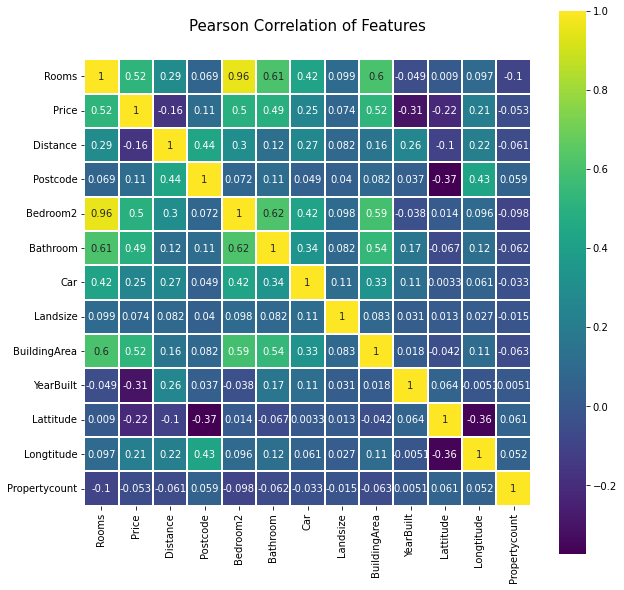

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [30]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
dfo = pd.read_csv(ruta)

In [31]:
dfo = dfo.select_dtypes(exclude=['object'])
dfo

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [32]:
#Borrado de datos nulos
dfo = dfo.dropna()
dfo

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [33]:
#Remover valores más allá de 3 desviaciones entándar
df1 = dfo.copy()
for columna in df1:
  df1 = df1[(np.abs(zscore(df1[columna]))<=3)]
df1 

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,4,951000.0,14.7,3152.0,4.0,2.0,2.0,704.0,200.0,1981.0,-37.85639,145.23536,5424.0
13571,4,1330000.0,14.7,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,-37.86887,145.22116,7082.0
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

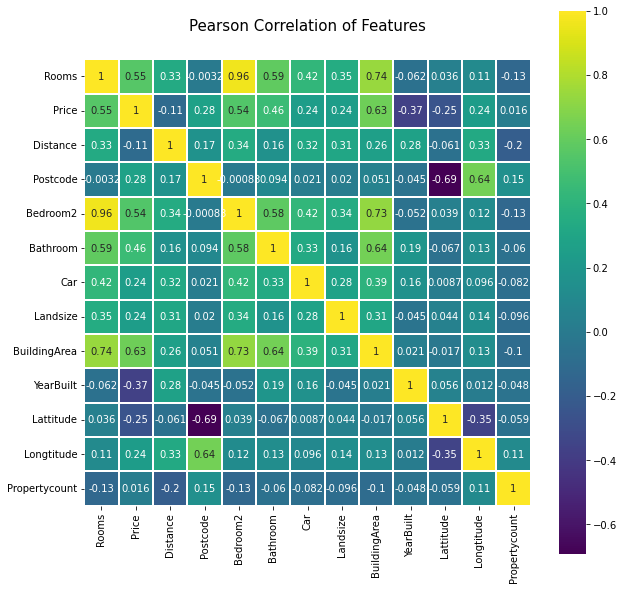

In [34]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
     

Text(0.5, 1.0, 'Distribución de precio y area construida')

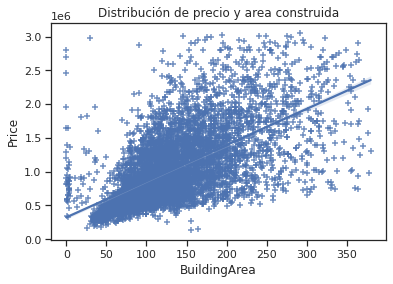

In [35]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="BuildingArea", y="Price", data=df1, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida')

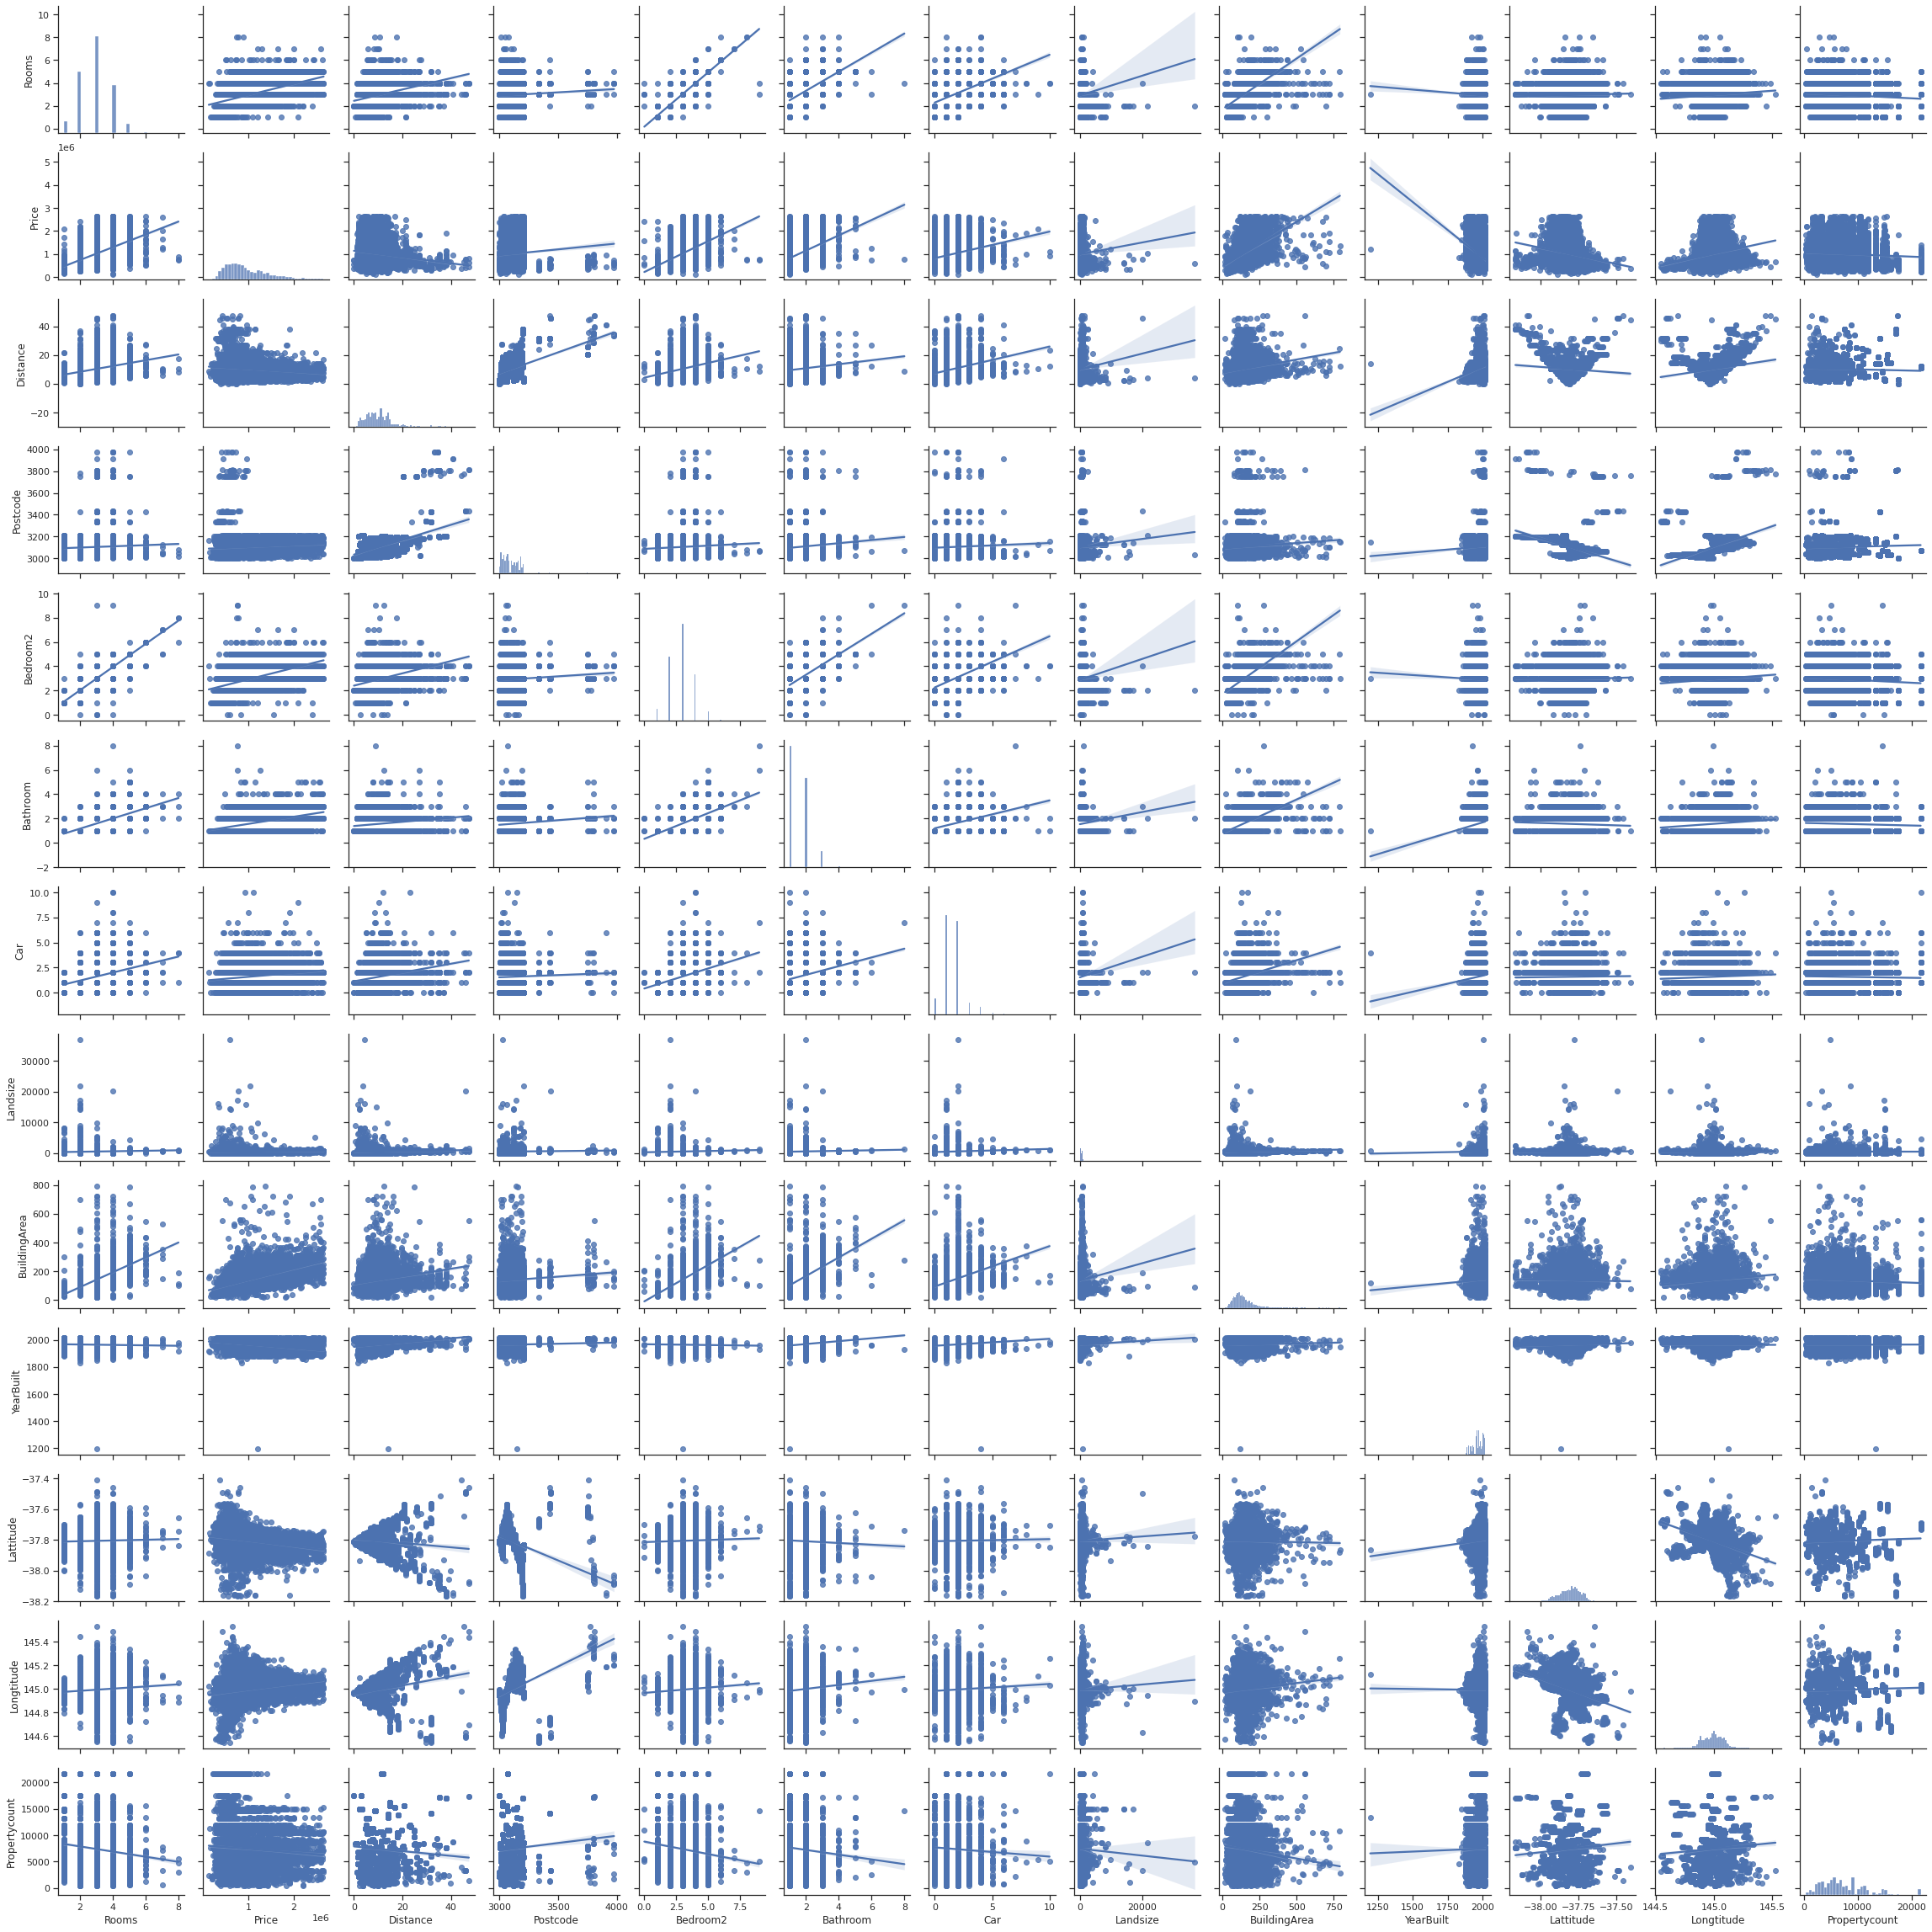

In [36]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(df0, kind='reg')

In [37]:
#Regresión lineal (Area construida vs. Precio)
x = df1["BuildingArea"]
y = df1["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:04:01   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.254e+05   1.27e+04     25.652   

In [38]:
df1.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [39]:
#Regresión lineal múltiple
#x = df1.iloc[:,[0,2,4,5,6,7,8,9,12]]
x = df1.iloc[:,[2,4,5,6,7,8,9,12]]
#x = df1.iloc[:,[2,5,6,7,8,9,12]]
y = df1["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:04:39   Log-Likelihood:                -84854.
No. Observations:                6005   AIC:                         1.697e+05
Df Residuals:                    5996   BIC:                         1.698e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.876e+06   2.55e+05     38.709

In [40]:
#Predicciones con scikit-learn
train, test = train_test_split(df1, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  4804
Ejemplos usados para test:  1201


In [41]:
#Se definen las variables
x_train = train.iloc[:,[2,4,5,6,7,8,9,12]]
y_train = train.Price
x_test = test.iloc[:,[2,4,5,6,7,8,9,12]]
y_test = test.Price

In [42]:
#Entrenamiento del modelo
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_train

2091    1326000.0
6420    1005000.0
2243    2806000.0
9342     740000.0
2100    1075000.0
          ...    
2040     600000.0
6696    1158000.0
3394    1850000.0
4240     740000.0
2806     920000.0
Name: Price, Length: 4804, dtype: float64

In [44]:
x_train

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
2091,1.6,3.0,2.0,1.0,0.0,190.0,2013.0,4553.0
6420,13.8,4.0,2.0,1.0,696.0,183.0,1950.0,2698.0
2243,8.5,4.0,3.0,2.0,669.0,255.0,1930.0,4898.0
9342,10.2,2.0,1.0,2.0,193.0,80.0,1970.0,5457.0
2100,1.6,3.0,1.0,0.0,183.0,104.0,1880.0,4553.0
...,...,...,...,...,...,...,...,...
2040,9.2,2.0,1.0,1.0,145.0,105.0,2010.0,3445.0
6696,7.0,4.0,1.0,3.0,411.0,96.0,1910.0,6543.0
3394,7.9,3.0,2.0,2.0,684.0,232.0,2000.0,5549.0
4240,8.4,2.0,2.0,1.0,213.0,127.0,2006.0,5498.0


In [45]:
#Regresión lineal múltiple de los datos de prueba
x = x_train
y = y_train
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     941.4
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:07:14   Log-Likelihood:                -67911.
No. Observations:                4804   AIC:                         1.358e+05
Df Residuals:                    4795   BIC:                         1.359e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.673e+06   2.87e+05     33.658

In [46]:
predicciones = regr.predict(x_train)
for y, y_pred in list(zip(y_train, predicciones)) [:10]:
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(y, y_pred))

Valor real: 1326000.00 - Valor estimado: 1220420.16
Valor real: 1005000.00 - Valor estimado: 1310622.35
Valor real: 2806000.00 - Valor estimado: 2019534.00
Valor real: 740000.00 - Valor estimado: 621107.87
Valor real: 1075000.00 - Valor estimado: 1373158.64
Valor real: 1875000.00 - Valor estimado: 1998856.92
Valor real: 470000.00 - Valor estimado: 314805.30
Valor real: 659000.00 - Valor estimado: 940950.60
Valor real: 858000.00 - Valor estimado: 1024338.40
Valor real: 365000.00 - Valor estimado: 444670.91


In [47]:
import itertools 


Variable:  Rooms
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2646.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:24   Log-Likelihood:                -86605.
No. Observations:                6005   AIC:                         1.732e+05
Df Residuals:                    6003   BIC:                         1.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.078e+05    1.9e+04  

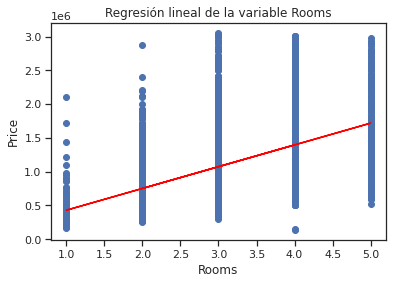


Variable:  Distance
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.12e-16
Time:                        14:08:25   Log-Likelihood:                -87667.
No. Observations:                6005   AIC:                         1.753e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.156e+06   1.54e+0

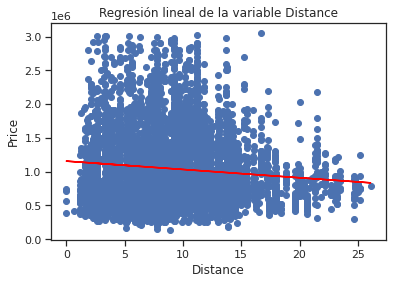


Variable:  Bedroom2
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     2495.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:25   Log-Likelihood:                -86658.
No. Observations:                6005   AIC:                         1.733e+05
Df Residuals:                    6003   BIC:                         1.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+05   1.91e+0

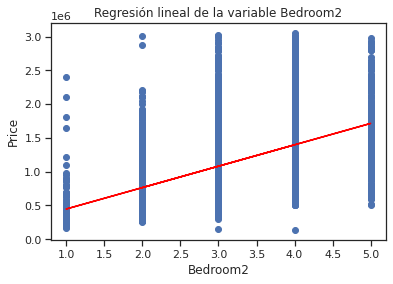


Variable:  Car
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     382.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.22e-82
Time:                        14:08:26   Log-Likelihood:                -87516.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.002e+05    1.4e+04    

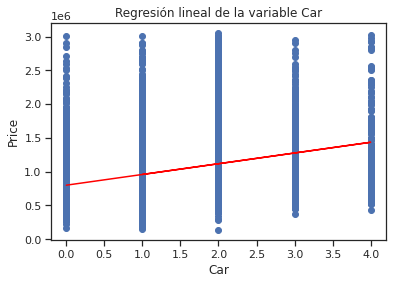


Variable:  Landsize
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.64e-82
Time:                        14:08:26   Log-Likelihood:                -87517.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.906e+05   1.02e+0

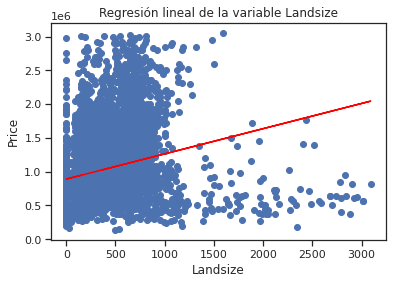


Variable:  BuildingArea
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:26   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.254e+05

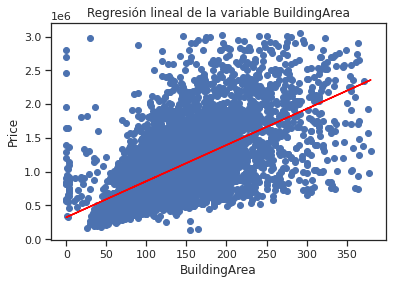


Variable:  YearBuilt
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     928.1
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          1.12e-189
Time:                        14:08:26   Log-Likelihood:                -87270.
No. Observations:                6005   AIC:                         1.745e+05
Df Residuals:                    6003   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.147e+07   3.42e+

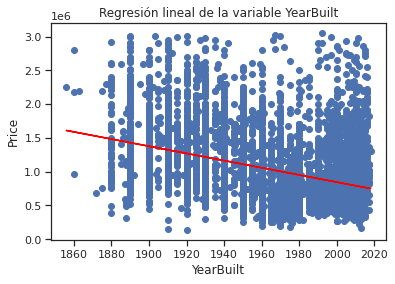


Variable:  Propertycount
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.591
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.207
Time:                        14:08:27   Log-Likelihood:                -87701.
No. Observations:                6005   AIC:                         1.754e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.025

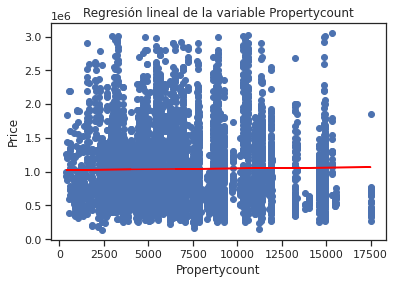


Variable:  Lattitude
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     402.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           9.50e-87
Time:                        14:08:27   Log-Likelihood:                -87506.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.205e+07   3.64e+

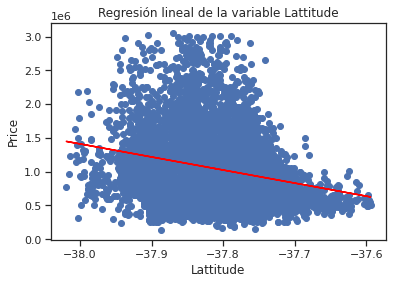


Variable:  Longtitude
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     364.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.73e-79
Time:                        14:08:27   Log-Likelihood:                -87525.
No. Observations:                6005   AIC:                         1.751e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.011e+08   1.06e

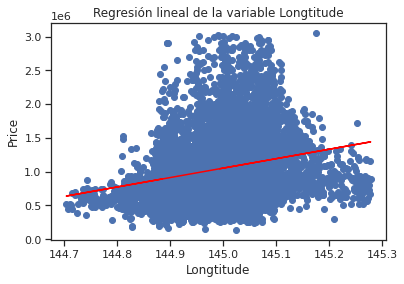


Variable:  Rooms
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2646.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:28   Log-Likelihood:                -86605.
No. Observations:                6005   AIC:                         1.732e+05
Df Residuals:                    6003   BIC:                         1.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.078e+05    1.9e+04  

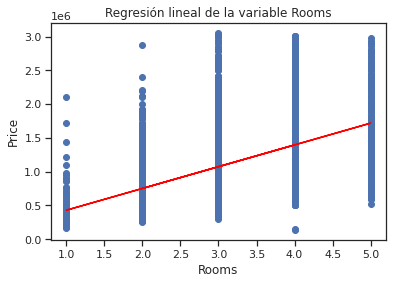


Variable:  Distance
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.12e-16
Time:                        14:08:28   Log-Likelihood:                -87667.
No. Observations:                6005   AIC:                         1.753e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.156e+06   1.54e+0

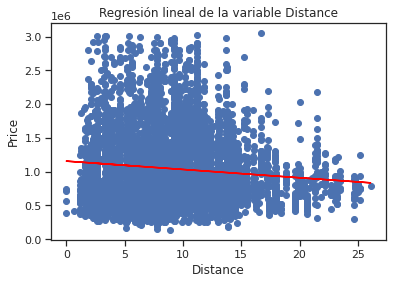


Variable:  Bedroom2
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     2495.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:28   Log-Likelihood:                -86658.
No. Observations:                6005   AIC:                         1.733e+05
Df Residuals:                    6003   BIC:                         1.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+05   1.91e+0

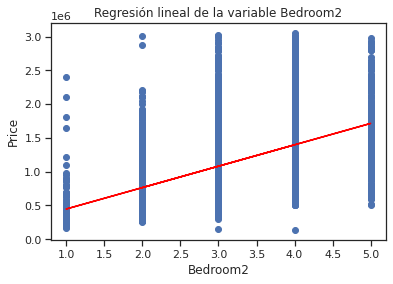


Variable:  Car
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     382.6
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.22e-82
Time:                        14:08:29   Log-Likelihood:                -87516.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.002e+05    1.4e+04    

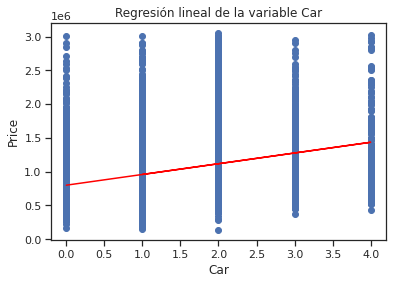


Variable:  Landsize
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.64e-82
Time:                        14:08:29   Log-Likelihood:                -87517.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.906e+05   1.02e+0

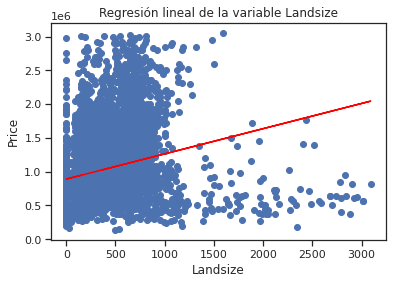


Variable:  BuildingArea
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:08:29   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.254e+05

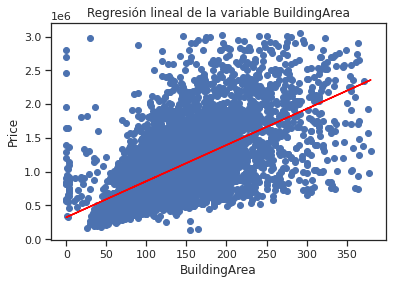


Variable:  YearBuilt
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     928.1
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          1.12e-189
Time:                        14:08:30   Log-Likelihood:                -87270.
No. Observations:                6005   AIC:                         1.745e+05
Df Residuals:                    6003   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.147e+07   3.42e+

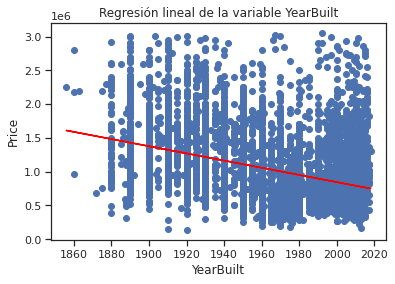


Variable:  Propertycount
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.591
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.207
Time:                        14:08:30   Log-Likelihood:                -87701.
No. Observations:                6005   AIC:                         1.754e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.025

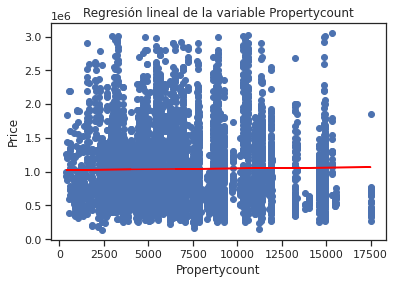


Variable:  Lattitude
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     402.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           9.50e-87
Time:                        14:08:30   Log-Likelihood:                -87506.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.205e+07   3.64e+

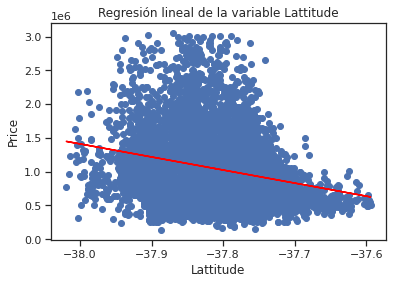


Variable:  Longtitude
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     364.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.73e-79
Time:                        14:08:31   Log-Likelihood:                -87525.
No. Observations:                6005   AIC:                         1.751e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.011e+08   1.06e

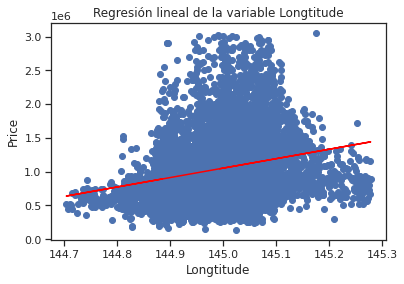

Mejor al cuadrado: 0.39240185180401554
Mejor variable: BuildingArea


In [48]:
#compara una sola
variables =['Rooms', 'Distance','Bedroom2', 'Car','Landsize','BuildingArea','YearBuilt','Propertycount','Lattitude','Longtitude']
for col1 in variables:
    x = df1[[col1]]
    y = df1['Price']
    x2 = sm.add_constant(x)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    print("\nVariable: ", col1)
    print(est2.summary())

    plt.scatter(x, y)
    plt.plot(x, est2.predict(x2), color='red')
    plt.xlabel(col1)
    plt.ylabel('Price')
    plt.title('Regresión lineal de la variable ' + col1)
    plt.show()
    best_r2 = 0
best_col = ''
for col1 in variables:
    x = df1[[col1]]
    y = df1['Price']
    x2 = sm.add_constant(x)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    r2 = est2.rsquared
    if r2 > best_r2:
        best_r2 = r2
        best_col = col1
    print("\nVariable: ", col1)
    print(est2.summary())

    plt.scatter(x, y)
    plt.plot(x, est2.predict(x2), color='red')
    plt.xlabel(col1)
    plt.ylabel('Price')
    plt.title('Regresión lineal de la variable ' + col1)
    plt.show()

print("Mejor al cuadrado:", best_r2)
print("Mejor variable:", best_col)

In [49]:
#compara 2 variables
variables =['Rooms', 'Distance','Bedroom2', 'Car','Landsize','BuildingArea','YearBuilt','Propertycount','Lattitude','Longtitude']
for col1, col2 in itertools.combinations(variables,2):
  x=df1[[col1,col2]]
  y=df1['Price']
  x2= sm.add_constant(x)
  est =sm.OLS(y,x2)
  est2 = est.fit()
  print("\nColumns: ",col1, "and", col2)
  print(est2.summary())
  best_r2 = 0
for col1, col2 in itertools.combinations(variables,2):
  x=df1[[col1,col2]]
  y=df1['Price']
  x2= sm.add_constant(x)
  est =sm.OLS(y,x2)
  est2 = est.fit()
  r2 = est2.rsquared
  if r2 > best_r2:
    best_r2 = r2
    best_columns = (col1, col2)
  print("\nColumns: ",col1, "and", col2)
  print(est2.summary())

print("mejor R-squared:", best_r2)
print("mejor columns:", best_columns)


Columns:  Rooms and Distance
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2014.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:10:23   Log-Likelihood:                -86160.
No. Observations:                6005   AIC:                         1.723e+05
Df Residuals:                    6002   BIC:                         1.723e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.761e+05 

In [50]:
#compara 3 variables
variables =['Rooms', 'Distance','Bedroom2', 'Car','Landsize','BuildingArea','YearBuilt','Propertycount','Lattitude','Longtitude']
best_r2 = 0
for col1, col2, col3 in itertools.combinations(variables,3):
  x=df1[[col1,col2,col3]]
  y=df1['Price']
  x2= sm.add_constant(x)
  est =sm.OLS(y,x2)
  est2 = est.fit()
  r2 = est2.rsquared
  if r2 > best_r2:
    best_r2 = r2
    best_columns = (col1, col2, col3)
  print("\nColumnas: ",col1, ",", col2, "y", col3)
  print(est2.summary())

print("Mejor R-squared:", best_r2)
print("Mejor columnas:", best_columns)


Columnas:  Rooms , Distance y Bedroom2
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1362.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:13:09   Log-Likelihood:                -86142.
No. Observations:                6005   AIC:                         1.723e+05
Df Residuals:                    6001   BIC:                         1.723e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       